In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Problem Statement

Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:

 The title of the ticket (text input)

 The text body of the ticket (text input)

 Any tags added by the user (categorical input, assumed here to be one-hot
encoded)

We can encode the text inputs as arrays of ones and zeros of size vocabulary_size.

Your model also has two outputs:

 The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)

 The department that should handle the ticket (a softmax over the set of departments)

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags]) # Combine input features into a single tensor, features, by concatenating them.
features = layers.Dense(64, activation="relu")(features) # Apply an intermediate layer to recombine input features into richer representations.

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

In [ ]:
import numpy as np
num_samples = 1280
 # Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
 # Dummy output data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [ ]:
model.compile(optimizer="rmsprop",
 loss=["mean_squared_error", "categorical_crossentropy"],
 metrics=[["mean_absolute_error"], ["accuracy"]])

In [ ]:
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=10)

Epoch 1/10
40/40 [==============================] - 6s 5ms/step - loss: 28.6975 - priority_loss: 0.3358 - department_loss: 28.3617 - priority_mean_absolute_error: 0.5006 - department_accuracy: 0.2539
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 32.5789 - priority_loss: 0.3415 - department_loss: 32.2374 - priority_mean_absolute_error: 0.5057 - department_accuracy: 0.2328
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 38.7817 - priority_loss: 0.3415 - department_loss: 38.4402 - priority_mean_absolute_error: 0.5057 - department_accuracy: 0.2867
Epoch 4/10
40/40 [==============================] - 0s 5ms/step - loss: 43.2647 - priority_loss: 0.3415 - department_loss: 42.9232 - priority_mean_absolute_error: 0.5057 - department_accuracy: 0.2914
Epoch 5/10
40/40 [==============================] - 0s 5ms/step - loss: 56.5413 - priority_loss: 0.3415 - department_loss: 56.1998 - priority_mean_absolute_error: 0.5057 - department_accuracy: 0.2508


In [ ]:
model.evaluate([title_data, text_body_data, tags_data],
 [priority_data, department_data])

40/40 [==============================] - 0s 4ms/step - loss: 113.3758 - priority_loss: 0.3415 - department_loss: 113.0343 - priority_mean_absolute_error: 0.5057 - department_accuracy: 0.2820


[113.37581634521484,
 0.34151870012283325,
 113.0342788696289,
 0.505698561668396,
 0.28203123807907104]

In [ ]:
priority_preds, department_preds = model.predict(
 [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [ ]:
priority_preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

If you don’t want to rely on input order (for instance, because you have many inputs
or outputs), you can also leverage the names you gave to the Input objects and the
output layers, and pass data via dictionaries.

In [ ]:
model.compile(optimizer="rmsprop", loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data}, epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


You can plot a Functional model as a graph with the plot_model() utility

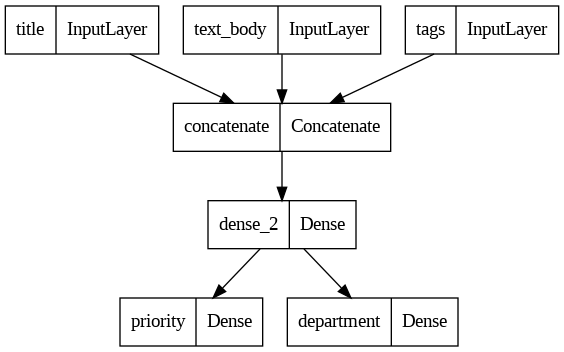

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

You can add to this plot the input and output shapes of each layer in the model, which
can be helpful during debugging

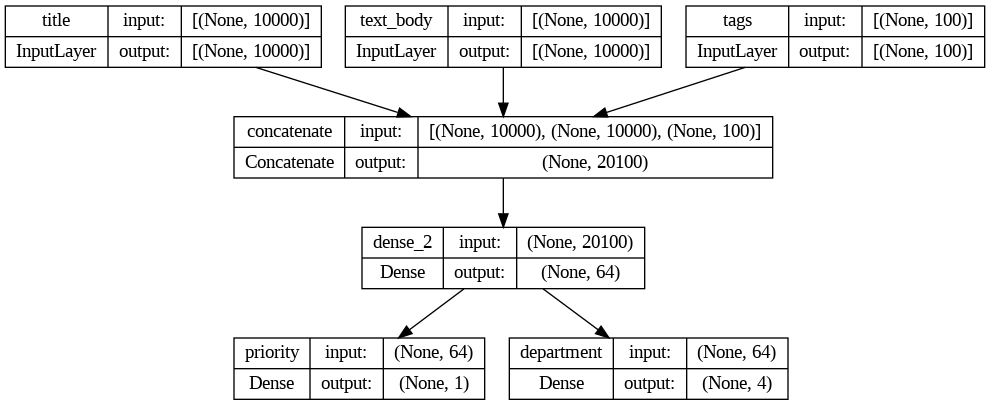

In [ ]:
keras.utils.plot_model(
 model, "ticket_classifier_with_shape_info.png", show_shapes=True)

The “None” in the tensor shapes represents the batch size: this model allows batches
of any size.

Access to layer connectivity also means that you can inspect and reuse individual
nodes (layer calls) in the graph. The model.layers model property provides the list
of layers that make up the model, and for each layer you can query layer.input and
layer.output.

In [ ]:
model.layers

In [ ]:
 model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

This enables you to do feature extraction, creating models that reuse intermediate features from another model.

Let’s say you want to add another output to the previous model—you want to estimate how long a given issue ticket will take to resolve, a kind of difficulty rating. You
could do this via a classification layer over three categories: “quick,” “medium,” and
“difficult.” You don’t need to recreate and retrain a model from scratch. You can start
from the intermediate features of your previous model, since you have access to them,
like this.


In [ ]:
features = model.layers[4].output
print(features)

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_2/Relu:0', description="created by layer 'dense_2'")


In [ ]:
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
 inputs=[title, text_body, tags],
 outputs=[priority, department, difficulty])

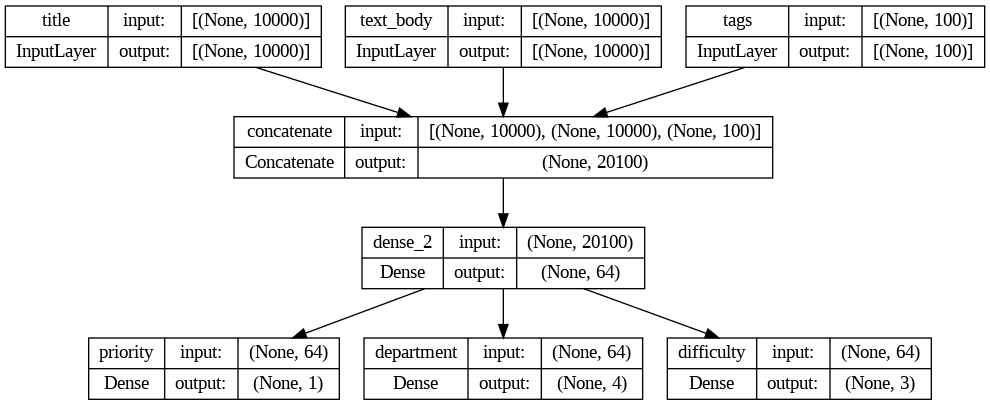

In [ ]:
keras.utils.plot_model(
 new_model, "updated_ticket_classifier.png", show_shapes=True)